<a href="https://colab.research.google.com/github/Leonardo-Mello22/Projeto-Teoria/blob/main/Graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

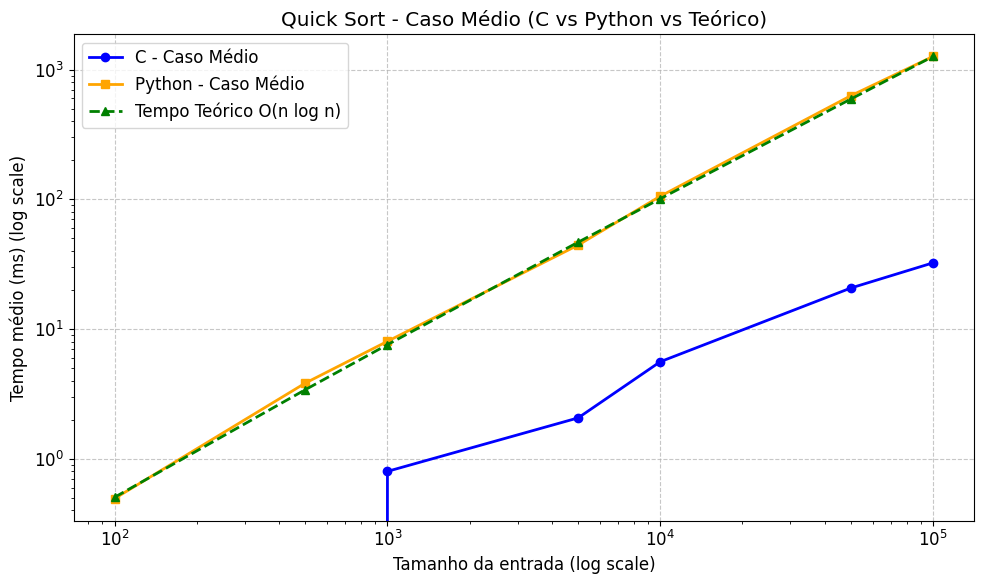

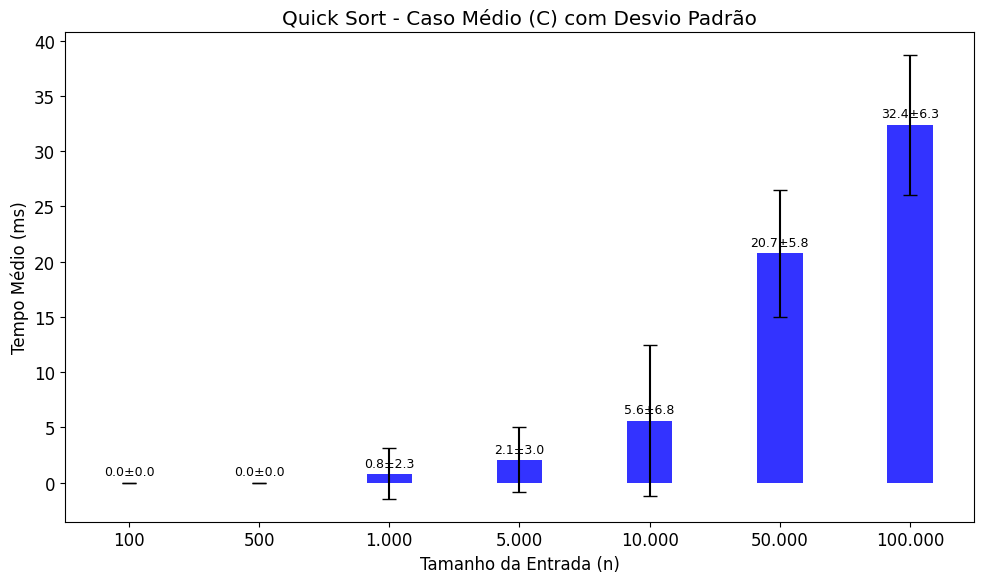

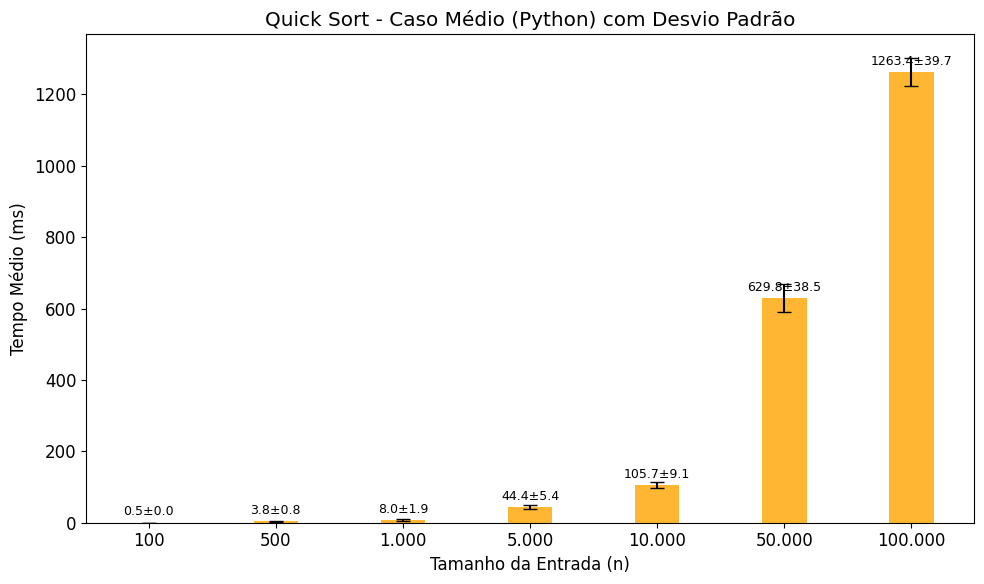

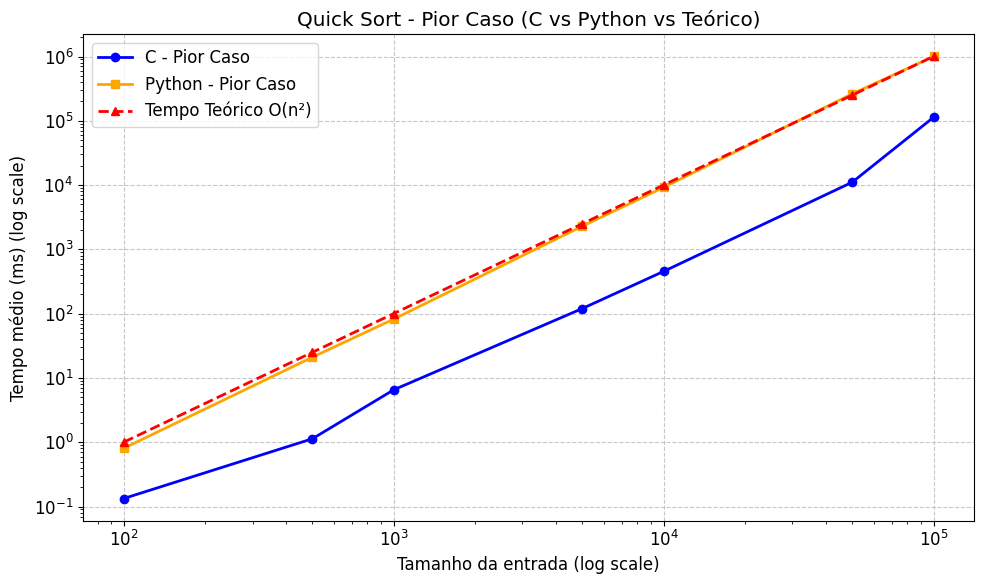

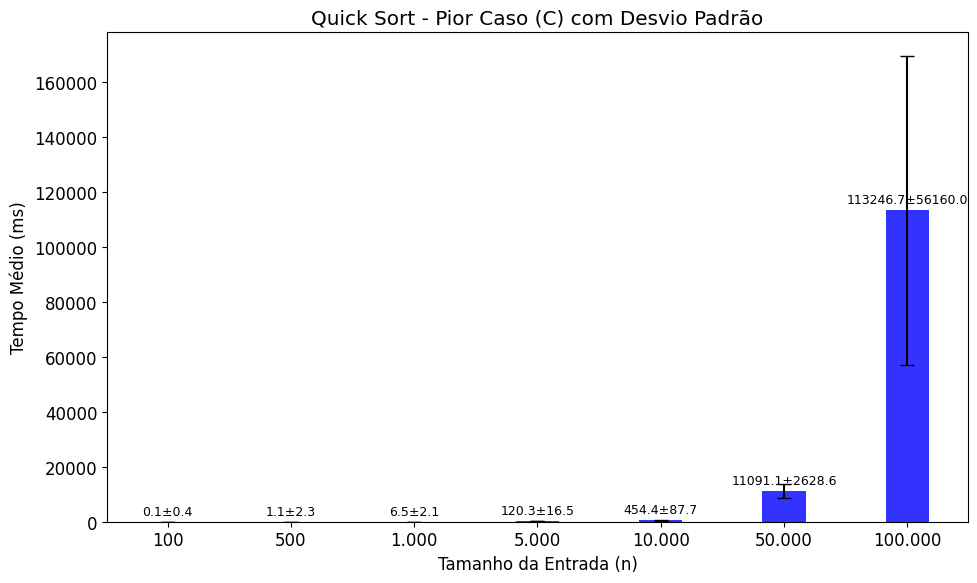

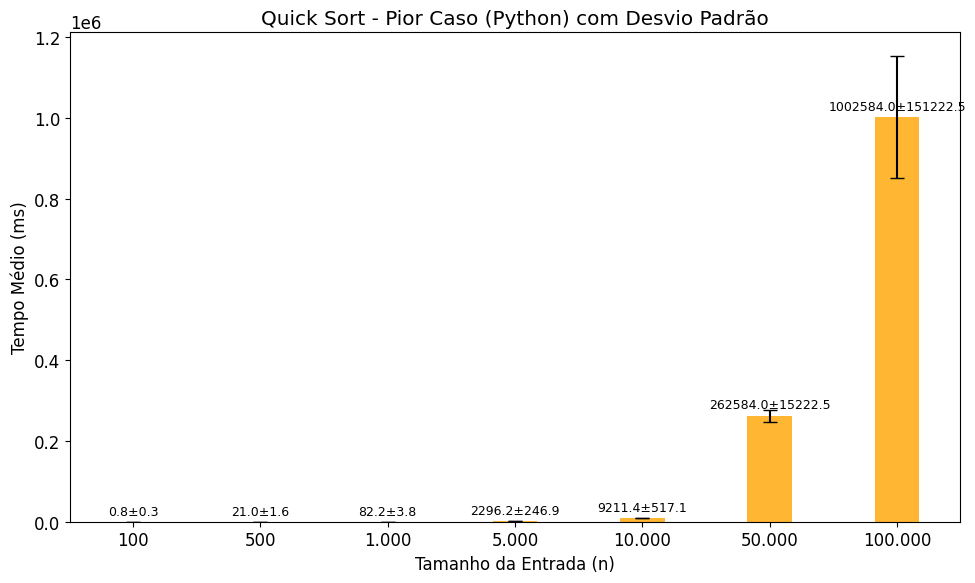

In [7]:
import matplotlib.pyplot as plt
import numpy as np

tamanhos = np.array([100, 500, 1000, 5000, 10000, 50000, 100000])
tamanhos_col = ['100', '500', '1.000', '5.000', '10.000', '50.000', '100.000']

tempo_c_medio = np.array([0.0, 0.0, 0.8, 2.0667, 5.6, 20.7333, 32.4])
desvio_c_medio = np.array([0.0, 0.0, 2.3361, 2.9633, 6.8013, 5.7504, 6.3336])
tempo_py_medio = np.array([0.4940, 3.8338, 8.0444, 44.3834, 105.6609, 629.8151, 1263.4240])
desvio_py_medio = np.array([0.0236, 0.7717, 1.8611, 5.4152, 9.0916, 38.4671, 39.7341])

tempo_c_pior = np.array([0.1333, 1.1333, 6.5333, 120.2667, 454.4, 11091.0667, 113246.6667])
desvio_c_pior = np.array([0.3519, 2.2636, 2.0656, 16.5074, 87.7430, 2628.5530, 56160.0324])
tempo_py_pior = np.array([0.8058, 21.0384, 82.1778, 2296.1964, 9211.3704, 262583.9901, 1002583.9901])
desvio_py_pior = np.array([0.2766, 1.6001, 3.7896, 246.9325, 517.0758, 15222.5014, 151222.5014])

nlogn = tamanhos * np.log2(tamanhos)
n2 = tamanhos ** 2

nlogn_norm = nlogn / nlogn[-1] * tempo_py_medio[-1]
n2_norm = n2 / n2[-1] * tempo_py_pior[-1]

def adicionar_valores(barras, desvios, ax):
    for barra, desvio in zip(barras, desvios):
        altura = barra.get_height()
        ax.annotate(f'{altura:.1f}±{desvio:.1f}',
                    xy=(barra.get_x() + barra.get_width() / 2, altura),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom', fontsize=9)

# --- Gráfico 1: Caso Médio - Linha (log-log) + tempo teórico ---
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(tamanhos, tempo_c_medio, 'o-', color='blue', label="C - Caso Médio", linewidth=2)
ax.plot(tamanhos, tempo_py_medio, 's-', color='orange', label="Python - Caso Médio", linewidth=2)
ax.plot(tamanhos, nlogn_norm, '^', color='green', linestyle='--', label='Tempo Teórico O(n log n)', linewidth=2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Tamanho da entrada (log scale)")
ax.set_ylabel("Tempo médio (ms) (log scale)")
ax.set_title("Quick Sort - Caso Médio (C vs Python vs Teórico)")
ax.legend()
ax.grid(which='major', linestyle='--', linewidth=0.8, alpha=0.7)
plt.tight_layout()
plt.show()

# --- Gráfico 2A: Caso Médio - Barras apenas para C ---
fig, ax = plt.subplots(figsize=(10,6))
barras_c = ax.bar(x, tempo_c_medio, largura, yerr=desvio_c_medio, capsize=5,
                  label='C', color='blue', alpha=0.8)
ax.set_xlabel('Tamanho da Entrada (n)')
ax.set_ylabel('Tempo Médio (ms)')
ax.set_title('Quick Sort - Caso Médio (C) com Desvio Padrão')
ax.set_xticks(x)
ax.set_xticklabels(tamanhos_col)
adicionar_valores(barras_c, desvio_c_medio, ax)
plt.tight_layout()
plt.show()

# --- Gráfico 2B: Caso Médio - Barras apenas para Python ---
fig, ax = plt.subplots(figsize=(10,6))
barras_py = ax.bar(x, tempo_py_medio, largura, yerr=desvio_py_medio, capsize=5,
                   label='Python', color='orange', alpha=0.8)
ax.set_xlabel('Tamanho da Entrada (n)')
ax.set_ylabel('Tempo Médio (ms)')
ax.set_title('Quick Sort - Caso Médio (Python) com Desvio Padrão')
ax.set_xticks(x)
ax.set_xticklabels(tamanhos_col)
adicionar_valores(barras_py, desvio_py_medio, ax)
plt.tight_layout()
plt.show()

# --- Gráfico 3: Pior Caso - Linha (log-log) + tempo teórico ---
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(tamanhos, tempo_c_pior, 'o-', color='blue', label="C - Pior Caso", linewidth=2)
ax.plot(tamanhos, tempo_py_pior, 's-', color='orange', label="Python - Pior Caso", linewidth=2)
ax.plot(tamanhos, n2_norm, '^', color='red', linestyle='--', label='Tempo Teórico O(n²)', linewidth=2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Tamanho da entrada (log scale)")
ax.set_ylabel("Tempo médio (ms) (log scale)")
ax.set_title("Quick Sort - Pior Caso (C vs Python vs Teórico)")
ax.legend()
ax.grid(which='major', linestyle='--', linewidth=0.8, alpha=0.7)
plt.tight_layout()
plt.show()

# --- Gráfico 4A: Pior Caso - Barras apenas para C ---
fig, ax = plt.subplots(figsize=(10,6))
barras_c = ax.bar(x, tempo_c_pior, largura, yerr=desvio_c_pior, capsize=5,
                  label='C', color='blue', alpha=0.8)
ax.set_xlabel('Tamanho da Entrada (n)')
ax.set_ylabel('Tempo Médio (ms)')
ax.set_title('Quick Sort - Pior Caso (C) com Desvio Padrão')
ax.set_xticks(x)
ax.set_xticklabels(tamanhos_col)
adicionar_valores(barras_c, desvio_c_pior, ax)
plt.tight_layout()
plt.show()

# --- Gráfico 4B: Pior Caso - Barras apenas para Python ---
fig, ax = plt.subplots(figsize=(10,6))
barras_py = ax.bar(x, tempo_py_pior, largura, yerr=desvio_py_pior, capsize=5,
                   label='Python', color='orange', alpha=0.8)
ax.set_xlabel('Tamanho da Entrada (n)')
ax.set_ylabel('Tempo Médio (ms)')
ax.set_title('Quick Sort - Pior Caso (Python) com Desvio Padrão')
ax.set_xticks(x)
ax.set_xticklabels(tamanhos_col)
adicionar_valores(barras_py, desvio_py_pior, ax)
plt.tight_layout()
plt.show()
